# KNN实现手写数字识别
## 1.项目背景
- 手写数字数据集主要用于进行图像识别，目的是将图片与分类结果（0~9）一一对应起来
- 本项目使用sklearn中自带的手写数字数据集进行KNN分类操作，其中有接近1800张图片，每张图片的大小是8x8像素
- 本项目分为三个阶段
    - 加载数据集：datasets获取
    - 准备阶段：可视化数据集描述，样本情况，图像效果，输入/输出特征；数据处理：缺失值、异常值处理，特征工程构建
    - 分类建模阶段：通过训练得到分类器，用测试集进行模型效果评估，随机抽取数据进行预测

## 2.载入库和模块

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 导入KNN相关模块
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier  # KNN分类器
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import preprocessing  # 数据预处理

## 3.载入数据集并进行探索

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
# 数据集的概况
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
d_data = digits.data
# 特征

In [7]:
d_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
d_data.shape

(1797, 64)

In [9]:
d_data[0]
# 展平之后的图像的像素点信息

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
digits.images
# 未展平的每幅图像的像素点信息

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [11]:
digits.images.shape

(1797, 8, 8)

In [12]:
digits.images[0]
# 第一幅图像的像素点信息

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

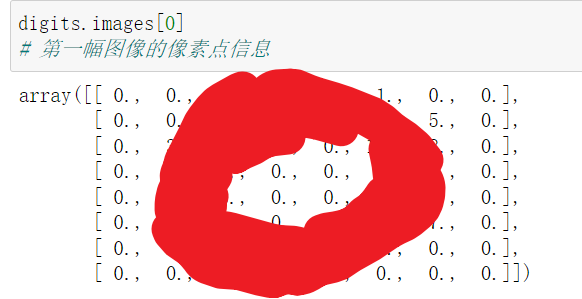

如何对数字矩阵进行可视化展示？热力图

<Axes: >

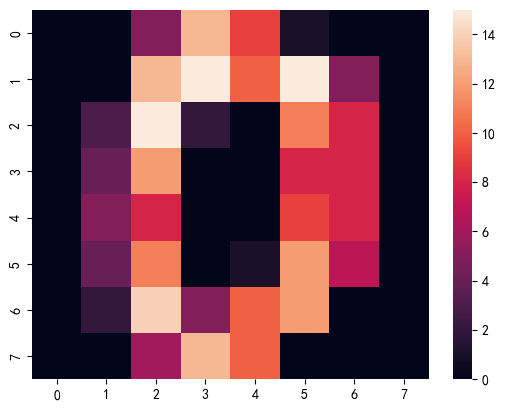

In [13]:
sns.heatmap(
    digits.images[0]
)

    plt.imshow(
        X,                # 要展示的数组类对象或PIL的图像
        cmap=None,          # 色彩映射
        norm=None,
        *,
        aspect=None,
        interpolation=None,
        alpha=None,
        vmin=None,
        vmax=None,
        origin=None,
        extent=None,
        interpolation_stage=None,
        filternorm=True,
        filterrad=4.0,
        resample=None,
        url=None,
        data=None,
        **kwargs,
    )

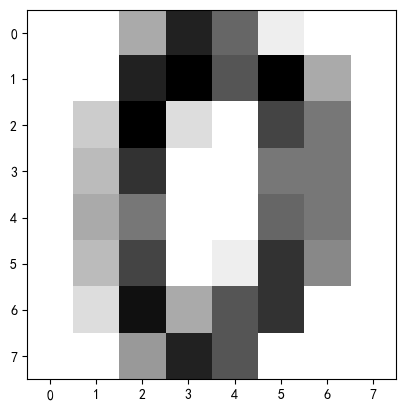

In [14]:
# 对结构化的数据进行可视化展示
plt.imshow(
    digits.images[0],
    cmap = plt.cm.gray_r  # 灰度效果
)

In [15]:
digits.images[:10]
# 前10幅图像，代表0~9的10个数字

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

In [16]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

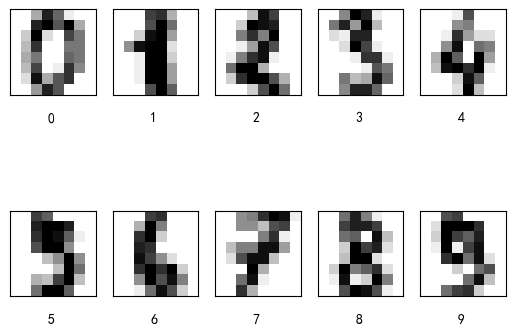

In [17]:
# 可视化观察前10个样本的效果（0~9的数字）
for i in range(1,11): 
    # subplot的索引从1开始
    plt.subplot(2, 5, i)
    # 将画布拆分为2行5列，依次定位到每个axes
    plt.imshow(
        digits.images[i-1],
        cmap = plt.cm.gray_r
    )
    
    # 辅助对象处理
    plt.xticks([])  # 隐藏x轴坐标刻度和刻度标签
    plt.yticks([])
    plt.text(3, 10, digits.target[i - 1])
    # 将每个图像对应的数字写在图像下方
plt.show()

In [18]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
print('第一幅图像的数据：\n',digits.images[0])
print('第一幅图像对应的类别（数字）：\n',digits.target[0])

第一幅图像的数据：
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
第一幅图像对应的类别（数字）：
 0


## 4.拆分数据集

In [20]:
# 75:25
train_X,test_X,train_y,test_y = train_test_split(
    d_data,             # 图像特征变量
    digits.target,      # 图像目标变量
    test_size = 0.25,
    random_state = 123456
)

In [21]:
train_X.shape

(1347, 64)

## 5.对数据进行标准化处理以便计算距离

In [22]:
ss = preprocessing.StandardScaler()
train_ss_X = ss.fit_transform(train_X)   # 将fit和transform一起进行处理
test_ss_X = ss.transform(test_X)         # 参数共享，测试集的数据不需要再进行训练

In [23]:
train_X[0]
# 未标准化的特征变量

array([ 0.,  0.,  7., 13., 16., 11.,  0.,  0.,  0.,  3., 16.,  5.,  4.,
       14.,  2.,  0.,  0.,  8., 11.,  1.,  4., 15.,  2.,  0.,  0.,  3.,
       12., 14., 16.,  8.,  0.,  0.,  0.,  0.,  8., 16., 15.,  1.,  0.,
        0.,  0.,  1., 15.,  5., 11., 12.,  0.,  0.,  0.,  3., 16.,  5.,
        7., 16.,  1.,  0.,  0.,  0.,  5., 14., 16., 15.,  2.,  0.])

In [24]:
train_ss_X[0]
# 标准化之后的特征变量

array([ 0.        , -0.34177896,  0.36249258,  0.26419181,  0.97251513,
        0.9170263 , -0.41341831, -0.13154685, -0.06344324,  0.2961621 ,
        1.03416291, -1.72043919, -1.30295692,  0.98845574,  0.03256894,
       -0.13647901, -0.05156009,  1.49755258,  0.20675996, -1.04908564,
       -0.49405388,  1.17977706,  0.04597587, -0.12025955, -0.03856149,
        0.18171761,  0.46824698,  0.86919228,  0.99619816,  0.08266927,
       -0.63041671, -0.05457478,  0.        , -0.66065989,  0.05378163,
        1.09741674,  0.80356131, -1.30338689, -0.82118512,  0.        ,
       -0.06370484, -0.18155381,  1.24426489, -0.35190678,  0.53248148,
        0.65353518, -0.80015199, -0.09308574, -0.03043007,  1.38013363,
        1.51036417, -0.85426942, -0.45394545,  1.21126796, -0.54671907,
       -0.2178834 ,  0.        , -0.30169709, -0.11079938,  0.43775467,
        0.8484907 ,  1.4117647 , -0.01440064, -0.20095388])

## 6.模型的训练和评估

In [25]:
# 创建KNN分类器
knn_model = KNeighborsClassifier()
# 训练模型（只加载数据）
knn_model.fit(train_ss_X, train_y)

KNeighborsClassifier()

In [26]:
# 在测试集上进行预测
pred_y = knn_model.predict(test_ss_X)

In [27]:
pred_y

array([8, 3, 2, 3, 1, 2, 5, 9, 6, 8, 8, 7, 7, 2, 7, 8, 3, 1, 4, 6, 3, 2,
       5, 2, 1, 8, 0, 7, 2, 8, 2, 9, 9, 0, 3, 4, 8, 8, 3, 6, 4, 4, 0, 5,
       4, 7, 3, 0, 3, 5, 2, 2, 6, 9, 1, 1, 3, 4, 8, 8, 5, 3, 8, 1, 3, 8,
       2, 7, 3, 9, 1, 6, 4, 4, 0, 8, 3, 2, 0, 3, 2, 7, 2, 9, 8, 4, 6, 6,
       1, 2, 6, 5, 1, 5, 7, 5, 4, 7, 5, 7, 8, 6, 4, 5, 3, 3, 5, 1, 9, 8,
       6, 3, 9, 5, 1, 4, 1, 0, 7, 0, 5, 0, 3, 3, 0, 8, 5, 7, 3, 4, 6, 9,
       4, 2, 9, 9, 0, 4, 7, 0, 4, 3, 0, 9, 6, 4, 0, 0, 5, 7, 9, 2, 9, 7,
       1, 7, 9, 3, 9, 0, 1, 1, 9, 9, 3, 4, 9, 5, 8, 6, 1, 0, 9, 6, 6, 3,
       6, 2, 2, 7, 5, 4, 0, 7, 6, 0, 6, 0, 2, 5, 3, 9, 3, 6, 1, 6, 3, 0,
       8, 0, 3, 7, 9, 6, 7, 9, 6, 9, 9, 5, 1, 3, 3, 4, 4, 6, 5, 8, 8, 1,
       4, 5, 4, 0, 5, 5, 3, 5, 3, 3, 6, 7, 7, 1, 3, 8, 3, 7, 9, 0, 1, 6,
       8, 8, 3, 6, 5, 5, 0, 0, 3, 6, 3, 6, 2, 7, 7, 1, 3, 9, 7, 6, 4, 4,
       4, 1, 4, 4, 6, 4, 5, 3, 8, 7, 1, 8, 3, 5, 1, 6, 8, 7, 3, 4, 4, 1,
       4, 7, 4, 0, 6, 5, 1, 4, 4, 9, 2, 1, 7, 9, 8,

In [28]:
test_y

array([8, 3, 2, 3, 1, 2, 5, 9, 6, 8, 8, 7, 7, 2, 7, 8, 3, 1, 4, 6, 3, 2,
       5, 2, 1, 8, 0, 4, 2, 8, 2, 9, 9, 0, 3, 4, 8, 8, 3, 6, 4, 4, 0, 5,
       4, 7, 3, 0, 3, 5, 2, 2, 6, 9, 1, 1, 3, 4, 8, 8, 5, 3, 8, 1, 3, 8,
       2, 7, 3, 9, 1, 6, 4, 4, 0, 8, 3, 2, 0, 3, 2, 7, 2, 9, 8, 4, 6, 6,
       1, 2, 6, 5, 1, 5, 7, 5, 4, 7, 5, 7, 8, 6, 4, 5, 3, 3, 5, 1, 9, 8,
       6, 3, 9, 5, 1, 4, 1, 0, 7, 0, 5, 0, 3, 3, 0, 8, 5, 7, 3, 4, 6, 9,
       4, 2, 5, 5, 0, 4, 7, 0, 4, 3, 0, 9, 6, 4, 0, 0, 5, 7, 9, 2, 9, 7,
       1, 4, 9, 3, 9, 0, 1, 1, 9, 9, 3, 4, 9, 5, 8, 6, 1, 0, 9, 6, 6, 3,
       6, 2, 2, 7, 5, 4, 0, 7, 6, 0, 6, 0, 2, 5, 3, 9, 3, 6, 1, 6, 3, 0,
       8, 0, 3, 7, 9, 6, 3, 9, 6, 9, 9, 5, 1, 3, 3, 4, 4, 6, 5, 8, 8, 1,
       4, 5, 4, 0, 5, 5, 3, 5, 3, 3, 6, 7, 7, 1, 3, 8, 3, 9, 9, 0, 1, 6,
       8, 8, 3, 6, 5, 5, 0, 0, 3, 6, 3, 6, 2, 7, 7, 1, 3, 9, 7, 6, 4, 4,
       9, 1, 4, 4, 6, 4, 5, 3, 8, 7, 1, 8, 3, 5, 1, 6, 8, 7, 3, 4, 4, 1,
       4, 7, 4, 0, 6, 5, 1, 4, 4, 9, 2, 1, 7, 9, 8,

In [29]:
# 总体正确率
print('KNN模型总体正确率：',sklearn.metrics.accuracy_score(pred_y, test_y))

KNN模型总体正确率： 0.9777777777777777


In [30]:
# 误分类矩阵
sklearn.metrics.confusion_matrix(test_y, pred_y)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  1, 37]], dtype=int64)

<Axes: >

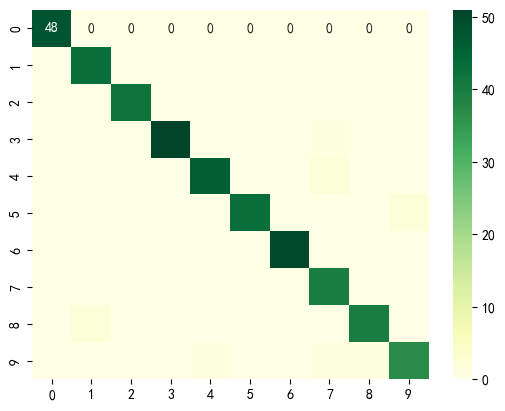

In [31]:
sns.heatmap(
    sklearn.metrics.confusion_matrix(test_y, pred_y),
    cmap = 'YlGn',
    annot = True
)

In [32]:
# 用函数实现对误分类矩阵的可视化
def show_confusion_matrix(confusion_martix = None):
    """
    函数功能：
        针对误分类矩阵进行可视化展示
    函数参数：
        confusion_martix : 要显示的误分类矩阵，可以通过metries进行获取
    函数返回值：
        None
    """
    # 热力图
    sns.heatmap(
        data = confusion_martix,
        cmap = 'YlGn',
        annot = True,
        annot_kws = {'fontsize':10},        # 数值的字体大小
        square = True,                      # 热力图呈现正方形效果
        linewidths = 0.1,                   # 分隔线粗细
        linecolor = 'grey',                 # 分隔线颜色
        cbar = False                        # 隐藏色彩映射的色条
    )
    
    # 辅助元素的处理
    ax = plt.gca()                          # 获取当前的axes
    ax.xaxis.tick_top()                     # 将xticks移动到顶端
    ax.set_xlabel('预测值', fontsize = 12)
    ax.set_ylabel('实际值', fontsize = 12)
    ax.xaxis.set_label_position('top')      # 将xlabel移动到顶端
    plt.title('误分类矩阵', fontsize = 16, y = 1.16)
    
    # 显示图像，隐藏提示信息
    plt.show()

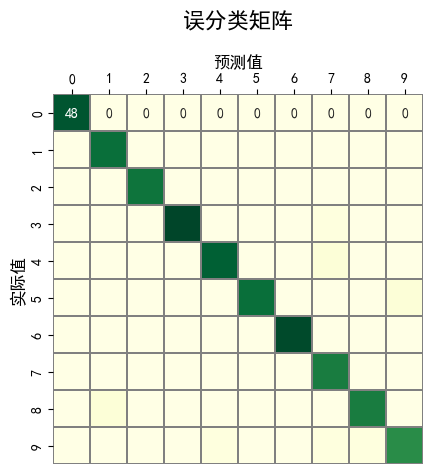

In [33]:
show_confusion_matrix(sklearn.metrics.confusion_matrix(test_y, pred_y))

In [34]:
# 使用分类评估报告观察模型效果
print(sklearn.metrics.classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.96      0.98        45
           2       1.00      1.00      1.00        42
           3       0.98      1.00      0.99        51
           4       0.96      0.98      0.97        47
           5       0.96      1.00      0.98        43
           6       1.00      1.00      1.00        50
           7       1.00      0.91      0.95        44
           8       0.95      0.98      0.96        41
           9       0.93      0.95      0.94        39

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



## 7.使用随机值进行预测

In [35]:
test_X.shape

(450, 64)

In [36]:
import random

In [37]:
item = random.choice(test_X)

In [38]:
item

array([ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  3., 15., 10.,  7.,
       16.,  4.,  0.,  0.,  9.,  8.,  0., 11., 10.,  0.,  0.,  0.,  3.,
       15., 11., 14.,  1.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,
        0.,  0.,  0., 14.,  7., 13.,  4.,  0.,  0.,  0.,  0.,  9.,  7.,
        6., 10.,  0.,  0.,  0.,  0.,  1., 12., 16.,  5.,  0.,  0.])

In [39]:
item.shape
# 一维结构

(64,)

In [40]:
# knn_model.predict(item)
# 传入的预测样本必须是一个二维结构，如果是一维结构，就会报错
'''
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
'''

'\nReshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.\n'

In [41]:
test_X.shape

(450, 64)

In [42]:
item.reshape(-1,64).shape

(1, 64)

In [43]:
knn_model.predict(item.reshape(-1,64))

array([1])

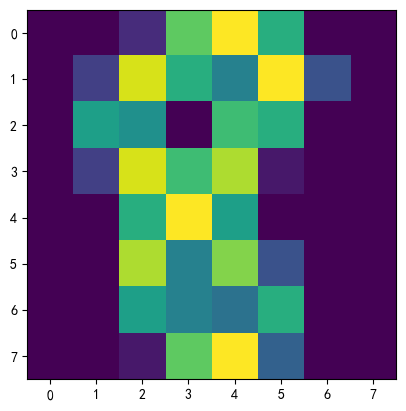

In [44]:
# 对抽取出来的数据进行可视化观察
plt.imshow(
    item.reshape(8,8)
)
# 注意：此处为了能够正确显示出对应的图形，需要将item 转换为 8*8 的二维数组

## 8.针对自己的手写数字图片进行预测
### 8.1 载入图片，转换为数组

In [45]:
from PIL import Image
# 图片操作模块

In [46]:
img = Image.open('data/1x.bmp')
# 载入图片

In [47]:
img

In [48]:
type(img)

PIL.BmpImagePlugin.BmpImageFile

In [49]:
img.show()
# 调用系统的图片浏览程序观看图片

In [50]:
img_arr = np.array(img)
# 将图片转换为数组

In [51]:
img_arr

array([[255, 255, 255, 236, 249, 255, 255, 255],
       [255, 255, 140,   1,  88, 255, 255, 255],
       [255, 255,  18,   2, 224, 255, 255, 255],
       [255, 255, 233,  27, 255, 255, 255, 255],
       [255, 255, 224,  32, 255, 255, 255, 255],
       [255, 255, 217,  41, 255, 255, 255, 255],
       [255, 214,  77,  11,  96, 255, 255, 255],
       [255, 242, 196, 204, 219, 255, 255, 255]], dtype=uint8)

In [52]:
img_arr.shape

(8, 8)

In [53]:
item.reshape(8,8)

array([[ 0.,  0.,  2., 12., 16., 10.,  0.,  0.],
       [ 0.,  3., 15., 10.,  7., 16.,  4.,  0.],
       [ 0.,  9.,  8.,  0., 11., 10.,  0.,  0.],
       [ 0.,  3., 15., 11., 14.,  1.,  0.,  0.],
       [ 0.,  0., 10., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0., 14.,  7., 13.,  4.,  0.,  0.],
       [ 0.,  0.,  9.,  7.,  6., 10.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16.,  5.,  0.,  0.]])

In [54]:
img_arr_x = 255 - img_arr

In [55]:
img_arr_x

array([[  0,   0,   0,  19,   6,   0,   0,   0],
       [  0,   0, 115, 254, 167,   0,   0,   0],
       [  0,   0, 237, 253,  31,   0,   0,   0],
       [  0,   0,  22, 228,   0,   0,   0,   0],
       [  0,   0,  31, 223,   0,   0,   0,   0],
       [  0,   0,  38, 214,   0,   0,   0,   0],
       [  0,  41, 178, 244, 159,   0,   0,   0],
       [  0,  13,  59,  51,  36,   0,   0,   0]], dtype=uint8)

### 8.2 预测

In [56]:
knn_model.predict(img_arr_x.reshape(-1,64))

array([1])

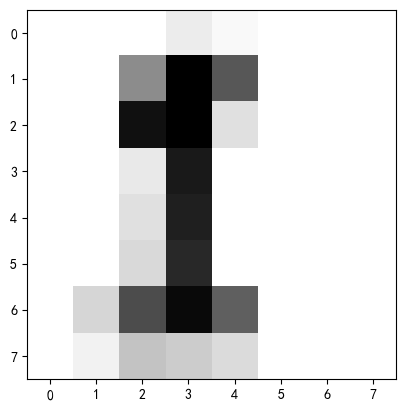

In [57]:
plt.imshow(img_arr_x , cmap = plt.cm.gray_r)